##### Algorithmics for Data Mining Project 1
# Exploratory Data Analysis
###### Darryl Abraham, Riccardo Paciello

## Libraries

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
import pingouin as pg

## Data import

In [332]:
df = pd.read_csv('data/spotifydata.csv')

## Data Overview

In [333]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Univariate Analysis

In [335]:
# Descriptive statistics
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

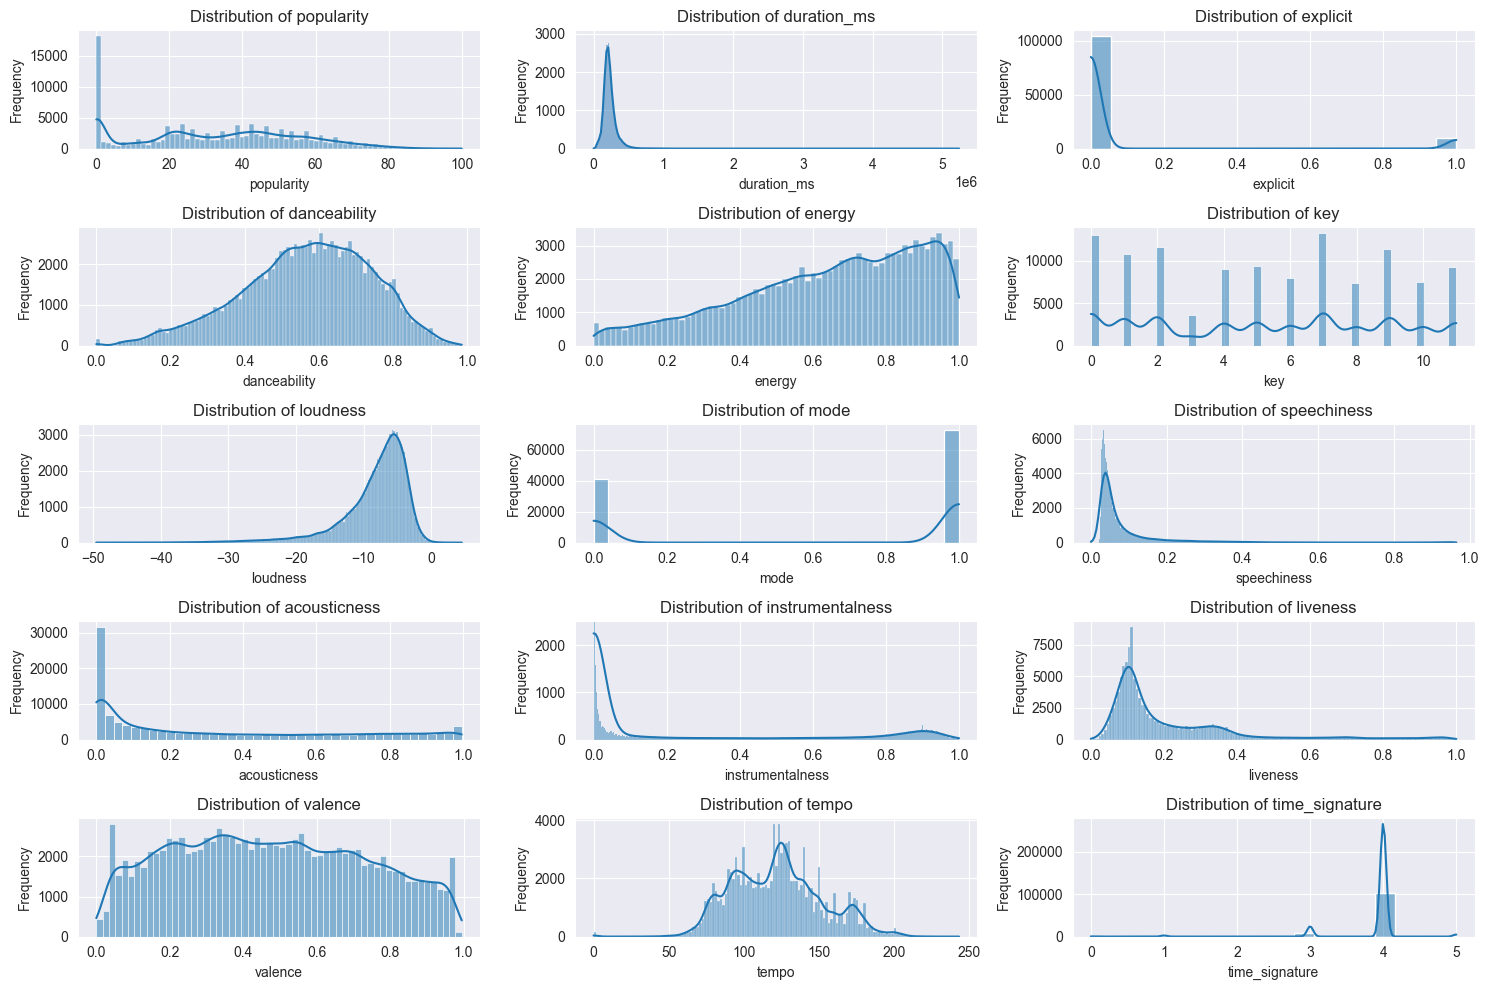

In [336]:
# Distributions
columns_to_skip = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
columns_to_plot = [col for col in df.columns if col not in columns_to_skip]

num_rows = 5  
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col not in columns_to_skip:
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    if col == 'instrumentalness':
        axes[i].set_ylim(0, 2500)

# Adjust layout
plt.tight_layout()
plt.show()

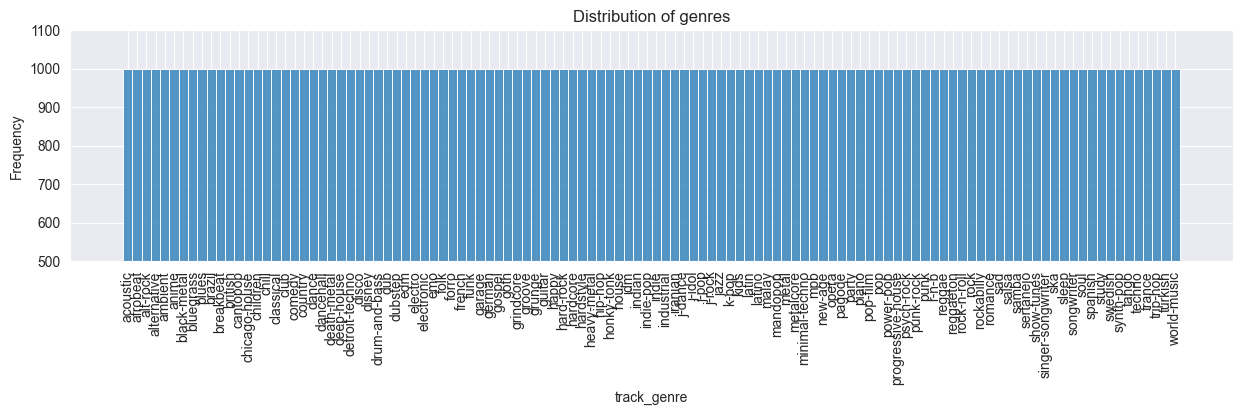

In [337]:
# Histogram of genres
plt.figure(figsize=(15, 3))
sns.histplot(df['track_genre'], kde=False)
plt.title('Distribution of genres')
plt.xlabel('track_genre')
plt.ylabel('Frequency')
plt.ylim(500, 1100)
plt.xticks(rotation=90)
plt.show()

In [338]:
# Most published artists
#df['artists'] = df['artists'].str.split(';')
#df_artist = df.explode('artists')
df_artist = df['artists'].value_counts()
df_artist.head(10)

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

## Multivariate Analysis

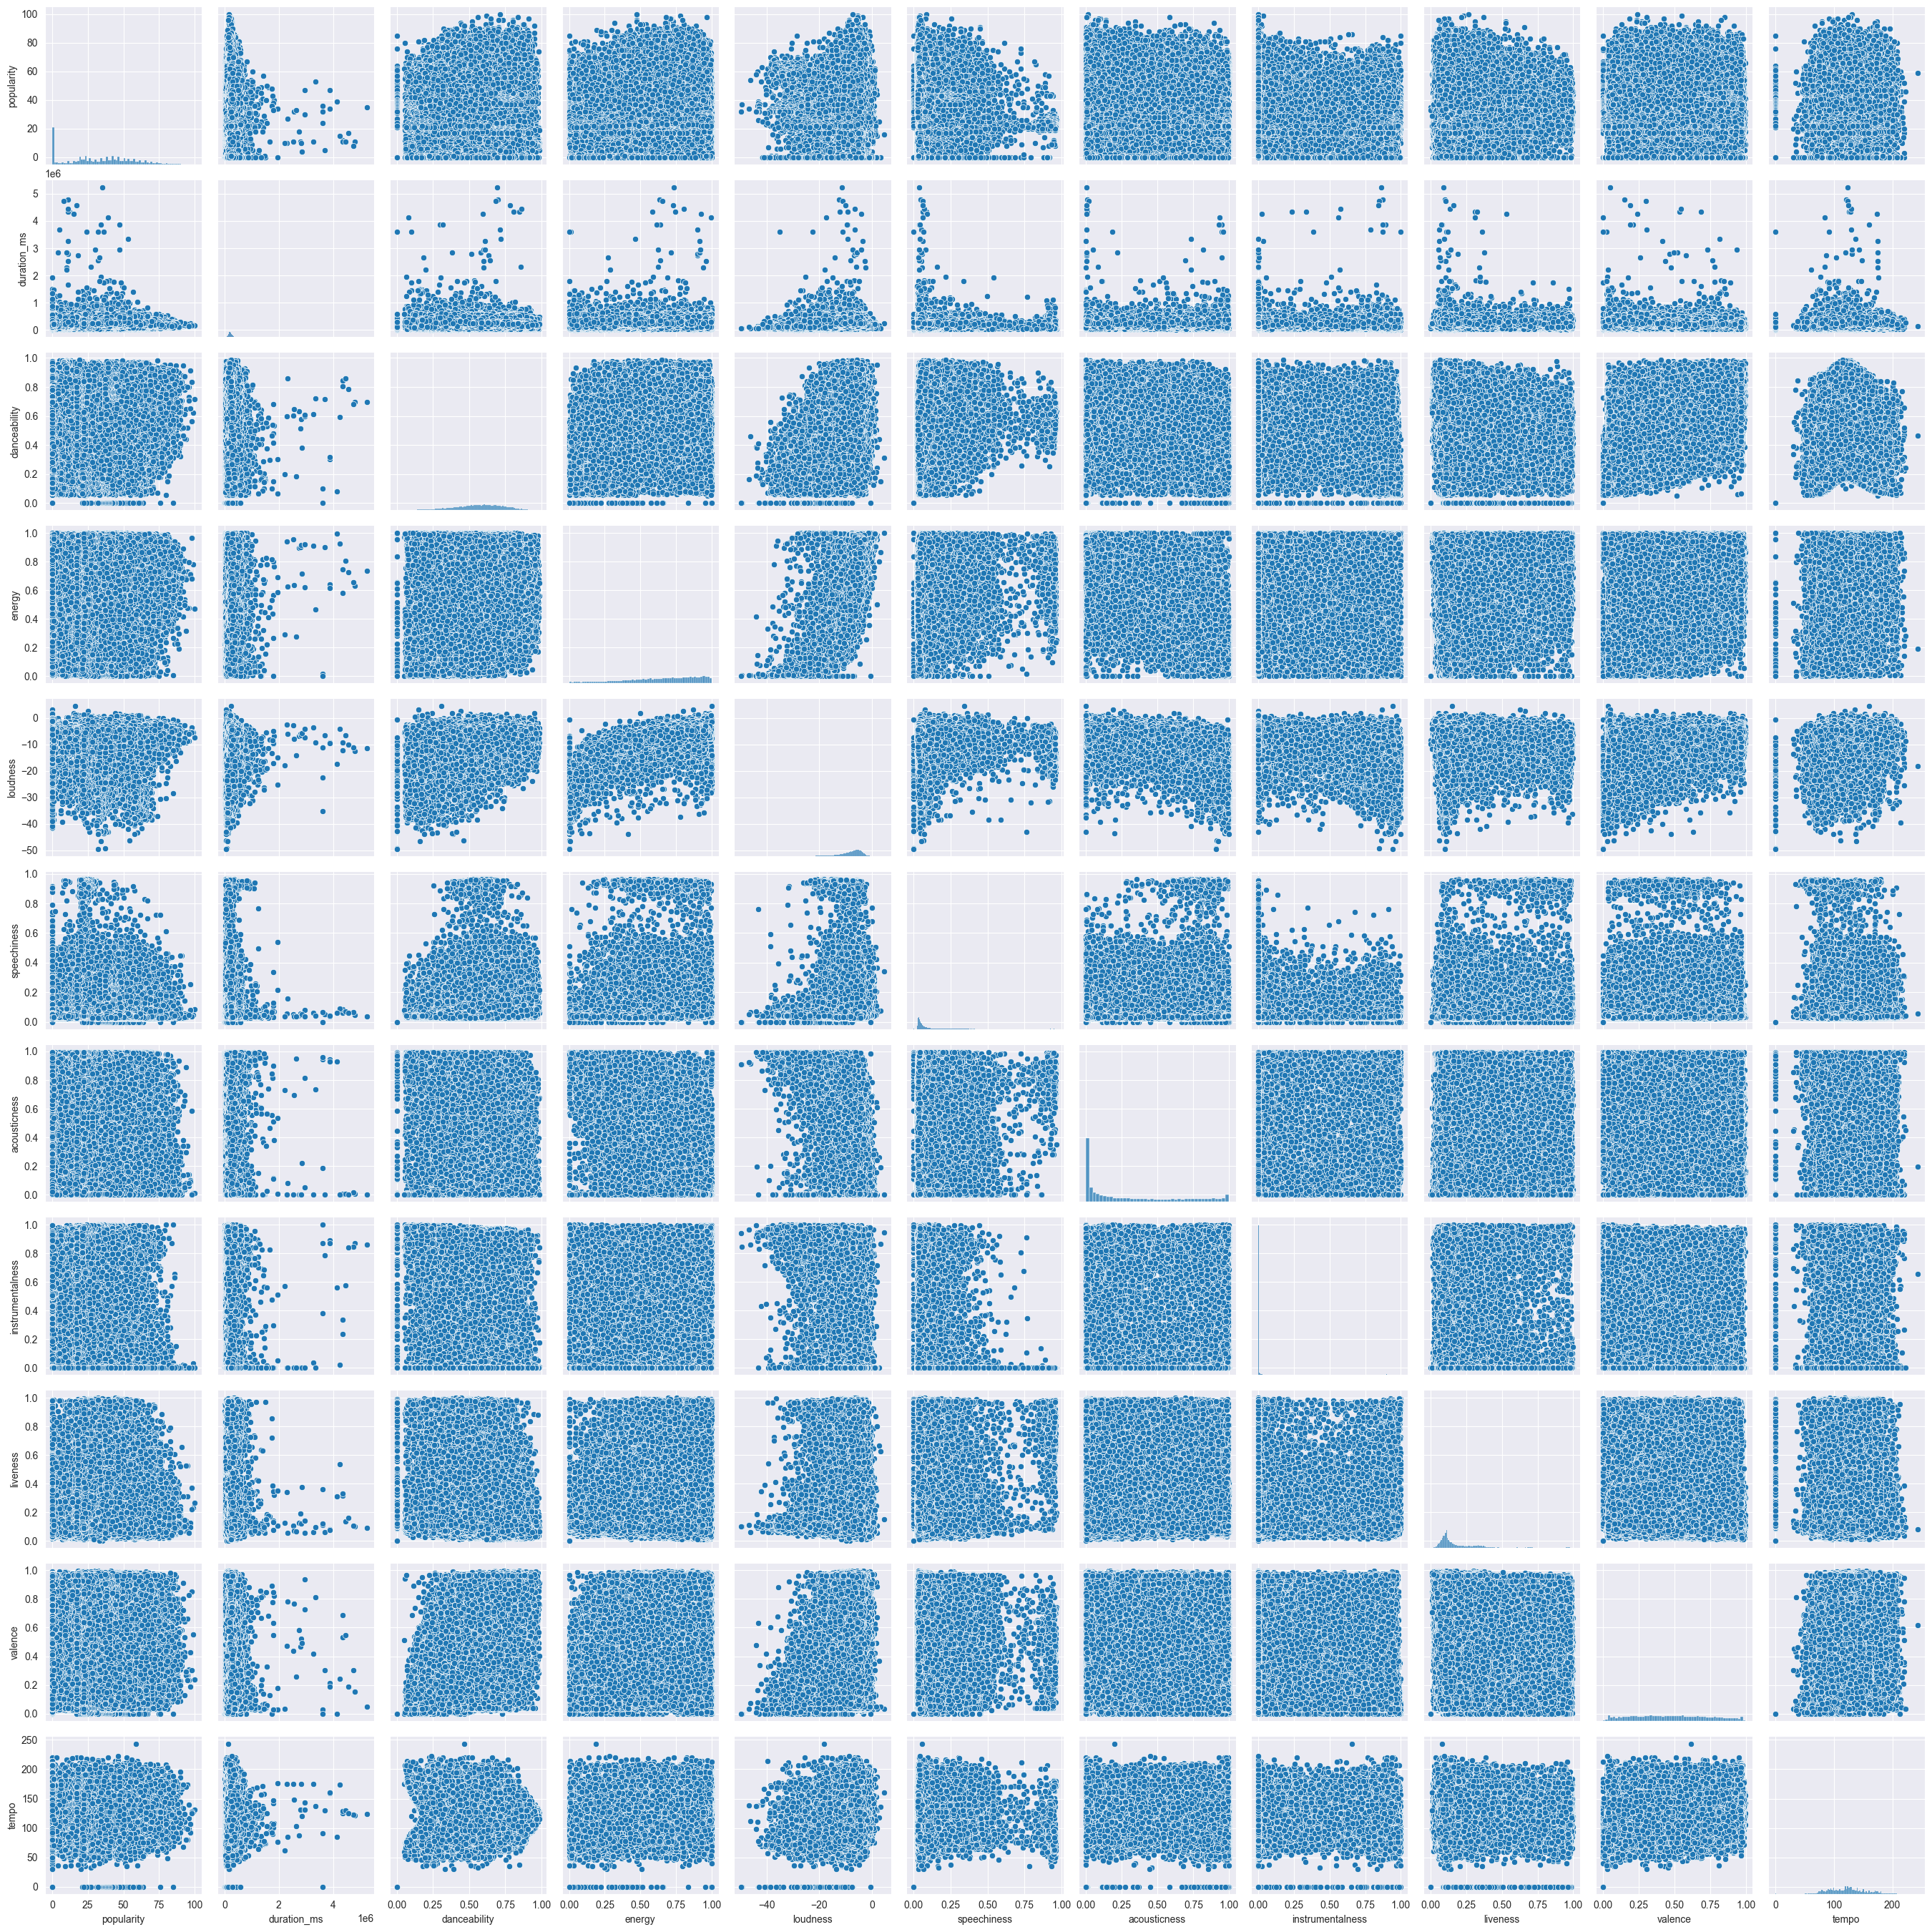

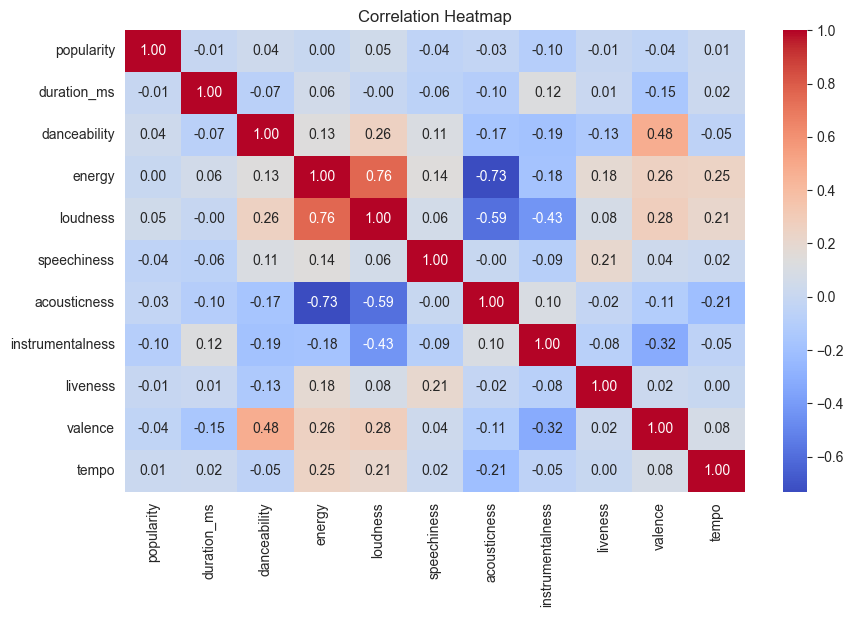

In [339]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop(columns=['Unnamed: 0', 'time_signature', 'mode', 'key'])
sns.pairplot(df_num)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Outlier Detection

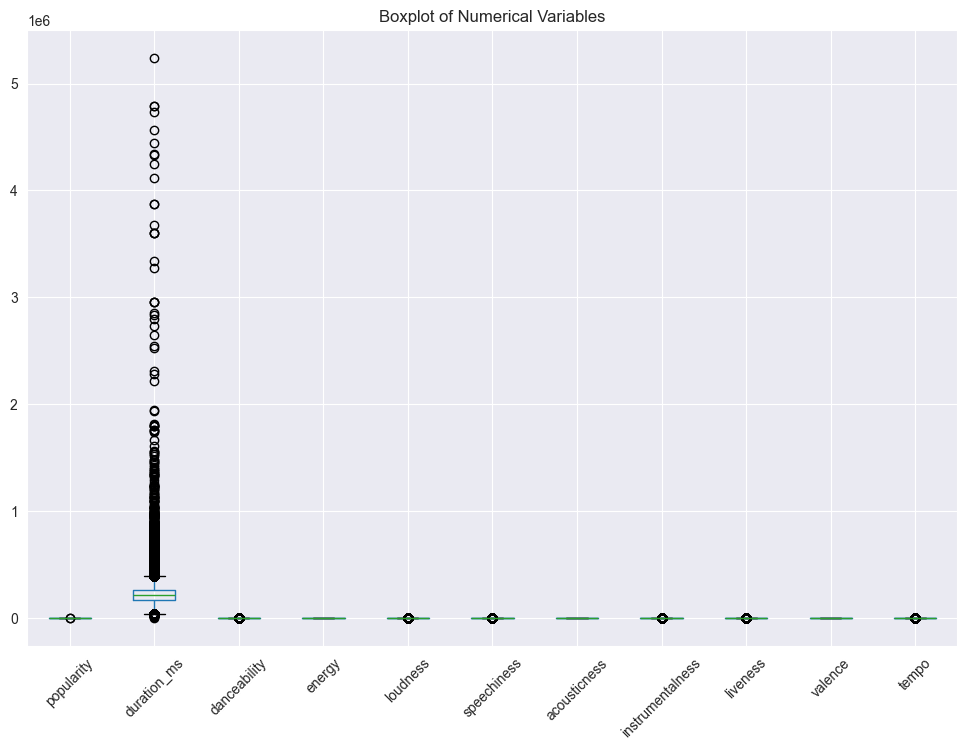

In [340]:
# Visualizing outliers
numerical_cols = df_num.columns
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

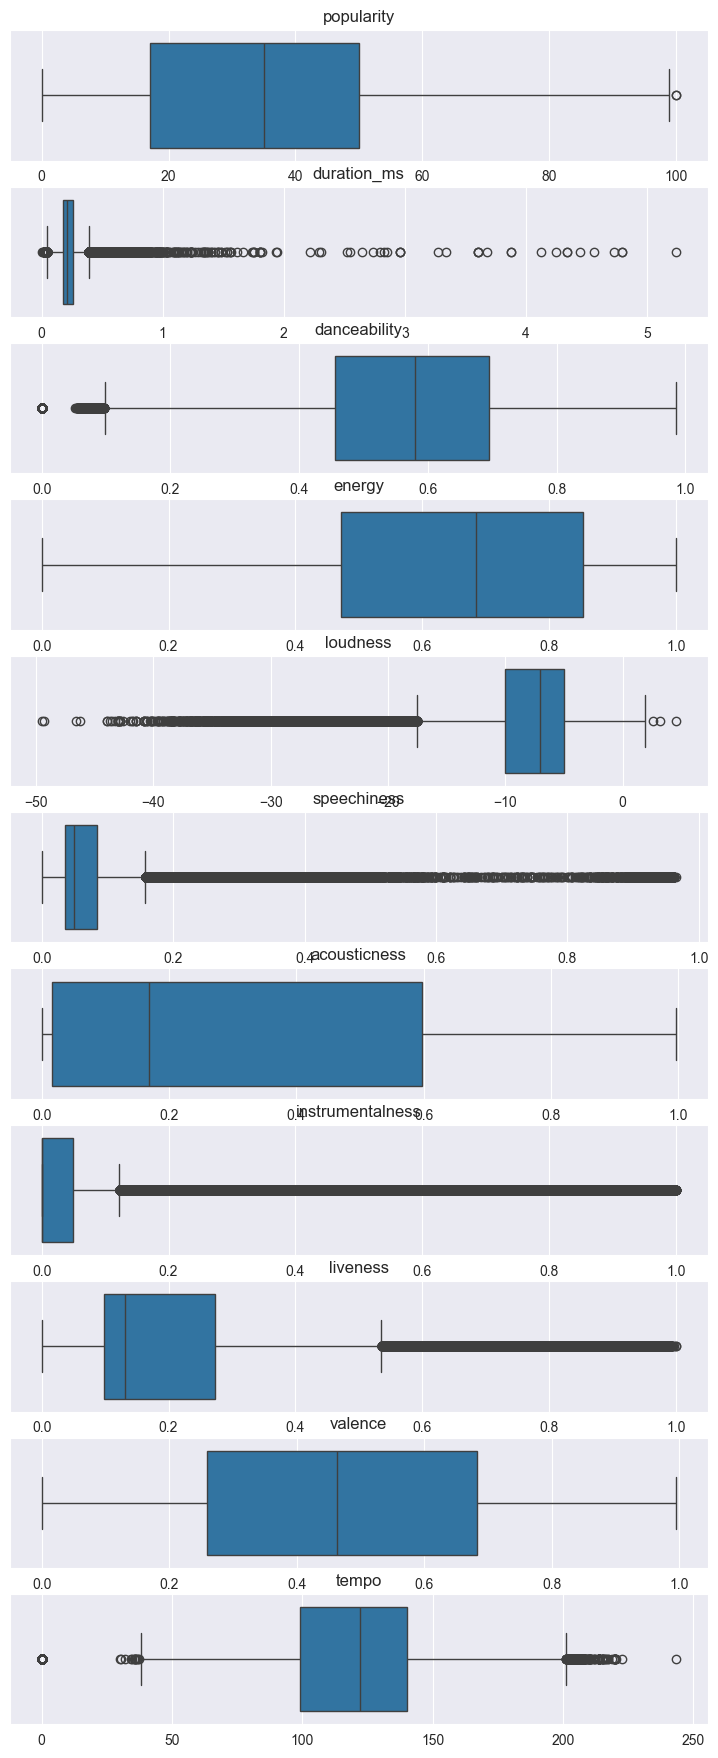

In [341]:
# Visualizing outliers 2
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(9, 2 * len(numerical_cols)))

# Individual boxplots
for i, col in enumerate(df_num.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.show()

In [342]:
# Univariate outliers using IQR
uni_outliers = {}
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    uni_outliers[col] = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)].index

In [343]:
unique = set()
for col, outlier_rows in uni_outliers.items():
    print(f'{col}: {outlier_rows.size}')
    unique.update(outlier_rows.values)
len(unique)

popularity: 0
duration_ms: 1223
danceability: 0
energy: 0
loudness: 1872
speechiness: 7643
acousticness: 0
instrumentalness: 23354
liveness: 3410
valence: 0
tempo: 0


33329

In [344]:
# Multivariate outlier detection using Mahalanobis distance
multi_outliers = {}
for genre in df['track_genre'].unique():
    genre_df = df[df['track_genre'] == genre]
    genre_df_num = genre_df.select_dtypes(include=['float64', 'int64'])
    genre_df_num = genre_df_num.drop(columns=['time_signature', 'mode', 'key'])
    robust_cov = MinCovDet(support_fraction=1).fit(genre_df_num)
    mahalanobis = robust_cov.mahalanobis(genre_df_num)
    threshold = chi2.ppf(0.99, df=genre_df_num.shape[1])
    multi_outliers[genre] = np.where(mahalanobis > threshold)
    print(len(genre_df.iloc[multi_outliers[genre][0]]['Unnamed: 0'].values))

129
121
179
142
132
102
134
154
121
109
130
89
137
208
144
135
171
93
181
129
95
90
117
106
189
148
83
134
187
206
164
125
106
130
140
100
135
93
91
110
87
97
140
95
214
114
107
142
171
88
212
95
193
138
96
183
132
147
155
128
105
211
129
154
203
142
120
148
113
125
109
170
163
193
130
150
128
100
176
97
140
81
165
136
154
172
184
98
106
95
93
135
102
188
128
137
127
82
132
116
191
105
116
105
103
119
112
176
152
164
119
85
143
181


In [345]:
for genre, outlier_rows in multi_outliers.items():
    print(f'{genre}: {len(outlier_rows[0])}')
print("Total outliers:" + str(sum([len(outlier_rows[0]) for outlier_rows in multi_outliers.values()])))

acoustic: 129
afrobeat: 121
alt-rock: 179
alternative: 142
ambient: 132
anime: 102
black-metal: 134
bluegrass: 154
blues: 121
brazil: 109
breakbeat: 130
british: 89
cantopop: 137
chicago-house: 208
children: 144
chill: 135
classical: 171
club: 93
comedy: 181
country: 129
dance: 95
dancehall: 90
death-metal: 117
deep-house: 106
detroit-techno: 189
disco: 148
disney: 83
drum-and-bass: 134
dub: 187
dubstep: 206
edm: 164
electro: 125
electronic: 106
emo: 130
folk: 140
forro: 100
french: 135
funk: 93
garage: 91
german: 110
gospel: 87
goth: 97
grindcore: 140
groove: 95
grunge: 214
guitar: 114
happy: 107
hard-rock: 142
hardcore: 171
hardstyle: 88
heavy-metal: 212
hip-hop: 95
honky-tonk: 193
house: 138
idm: 96
indian: 183
indie-pop: 132
indie: 147
industrial: 155
iranian: 128
j-dance: 105
j-idol: 211
j-pop: 129
j-rock: 154
jazz: 203
k-pop: 142
kids: 120
latin: 148
latino: 113
malay: 125
mandopop: 109
metal: 170
metalcore: 163
minimal-techno: 193
mpb: 130
new-age: 150
opera: 128
pagode: 100
par

## Principal Component Analysis

In [346]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_num_scaled)
pca_result_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Components
print("Explained variance: " + str(pca.explained_variance_))
print("Explained variance ratio: " + str(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio: " + str(np.cumsum(pca.explained_variance_ratio_)))
print("Component loadings: " + str(pca.components_))

Explained variance: [2.87578346 1.52426556 1.23755462 1.04916007 0.9618707  0.86391472
 0.83206448 0.73688215 0.45316313 0.32537513]
Explained variance ratio: [0.26143257 0.13856838 0.11250398 0.09537735 0.08744202 0.07853701
 0.07564156 0.0669887  0.04119629 0.0295793 ]
Cumulative explained variance ratio: [0.26143257 0.40000095 0.51250493 0.60788228 0.6953243  0.77386132
 0.84950288 0.91649158 0.95768786 0.98726716]
Component loadings: [[-0.03157846  0.01429616 -0.24707906 -0.50774604 -0.51680929 -0.10023762
   0.43801873  0.28449043 -0.08468691 -0.29544298 -0.18855042]
 [-0.02377009  0.40389975 -0.48339136  0.2645148   0.07755491 -0.08850166
  -0.31566416  0.3231295   0.14533916 -0.4857163   0.24024374]
 [ 0.12759086  0.16990328  0.20496957 -0.04341994  0.04353402 -0.618145
  -0.1723408   0.13096079 -0.68724763  0.05473828  0.06927847]
 [-0.85014477  0.15365002  0.22025857  0.06867651 -0.07594188  0.16130573
  -0.07981366  0.34464205 -0.11621211  0.16125525 -0.06302119]
 [ 0.2713085

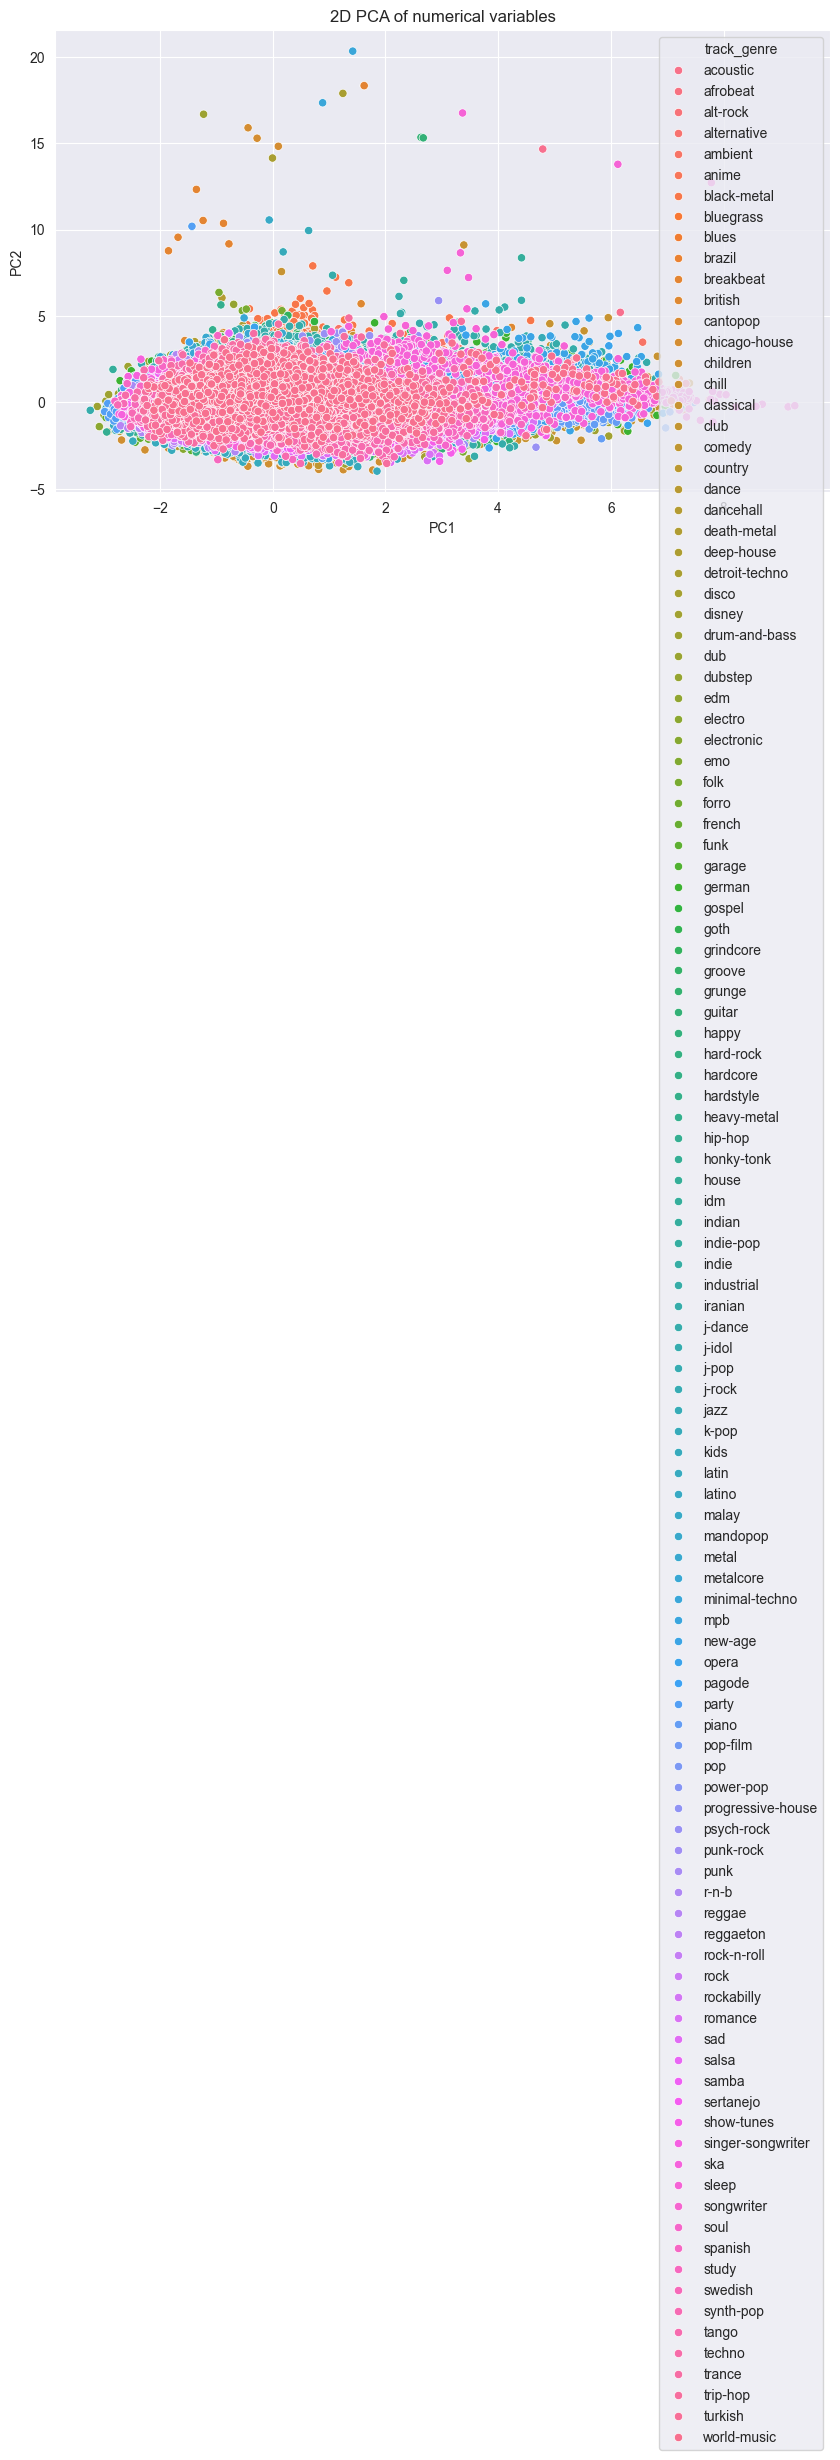

In [347]:
# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_result_df, hue=df['track_genre'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA of numerical variables')
plt.show()

In [348]:
loadings = pca.components_.T

fig = px.scatter()
fig.update_layout(title='Variable Projections on PC1 and PC2')
fig.update_xaxes(title_text='PC1')
fig.update_yaxes(title_text='PC2')

for i, feature in enumerate(df_pca.columns):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

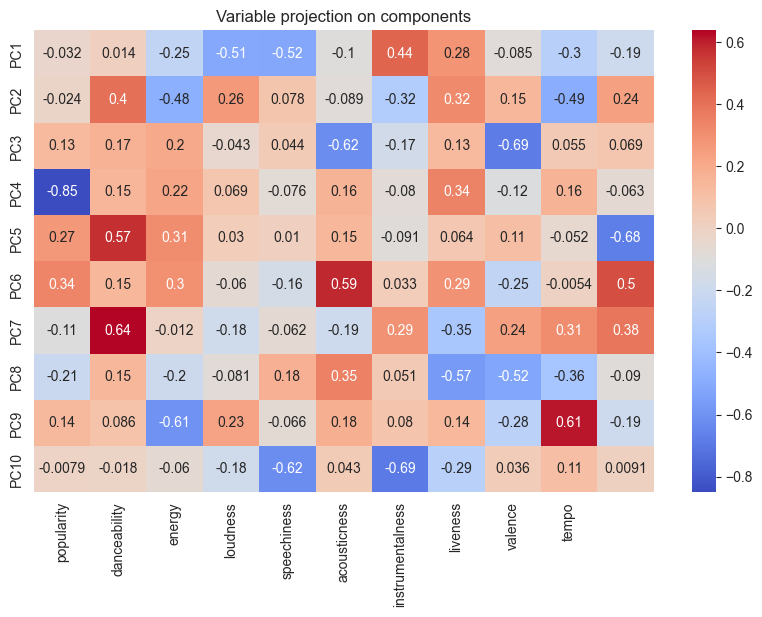

In [349]:
# Variable projection on components
plt.figure(figsize=(10, 6))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df_pca.columns, yticklabels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
plt.title('Variable projection on components')
plt.show()


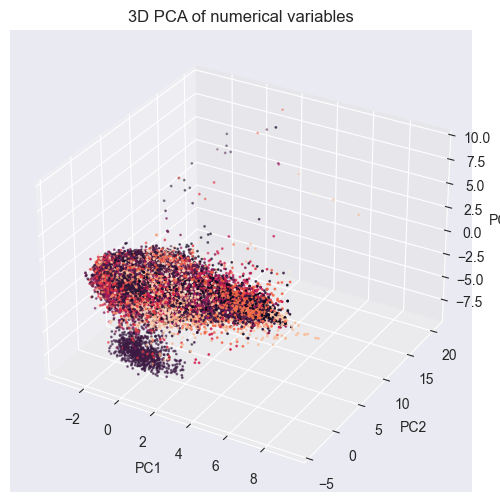

In [350]:
# Plot PCA 3D
label_encoder = LabelEncoder()
df['genre_code'] = label_encoder.fit_transform(df['track_genre'])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_df['PC1'], pca_result_df['PC2'], pca_result_df['PC3'], c=df['genre_code'], s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of numerical variables')
plt.show()

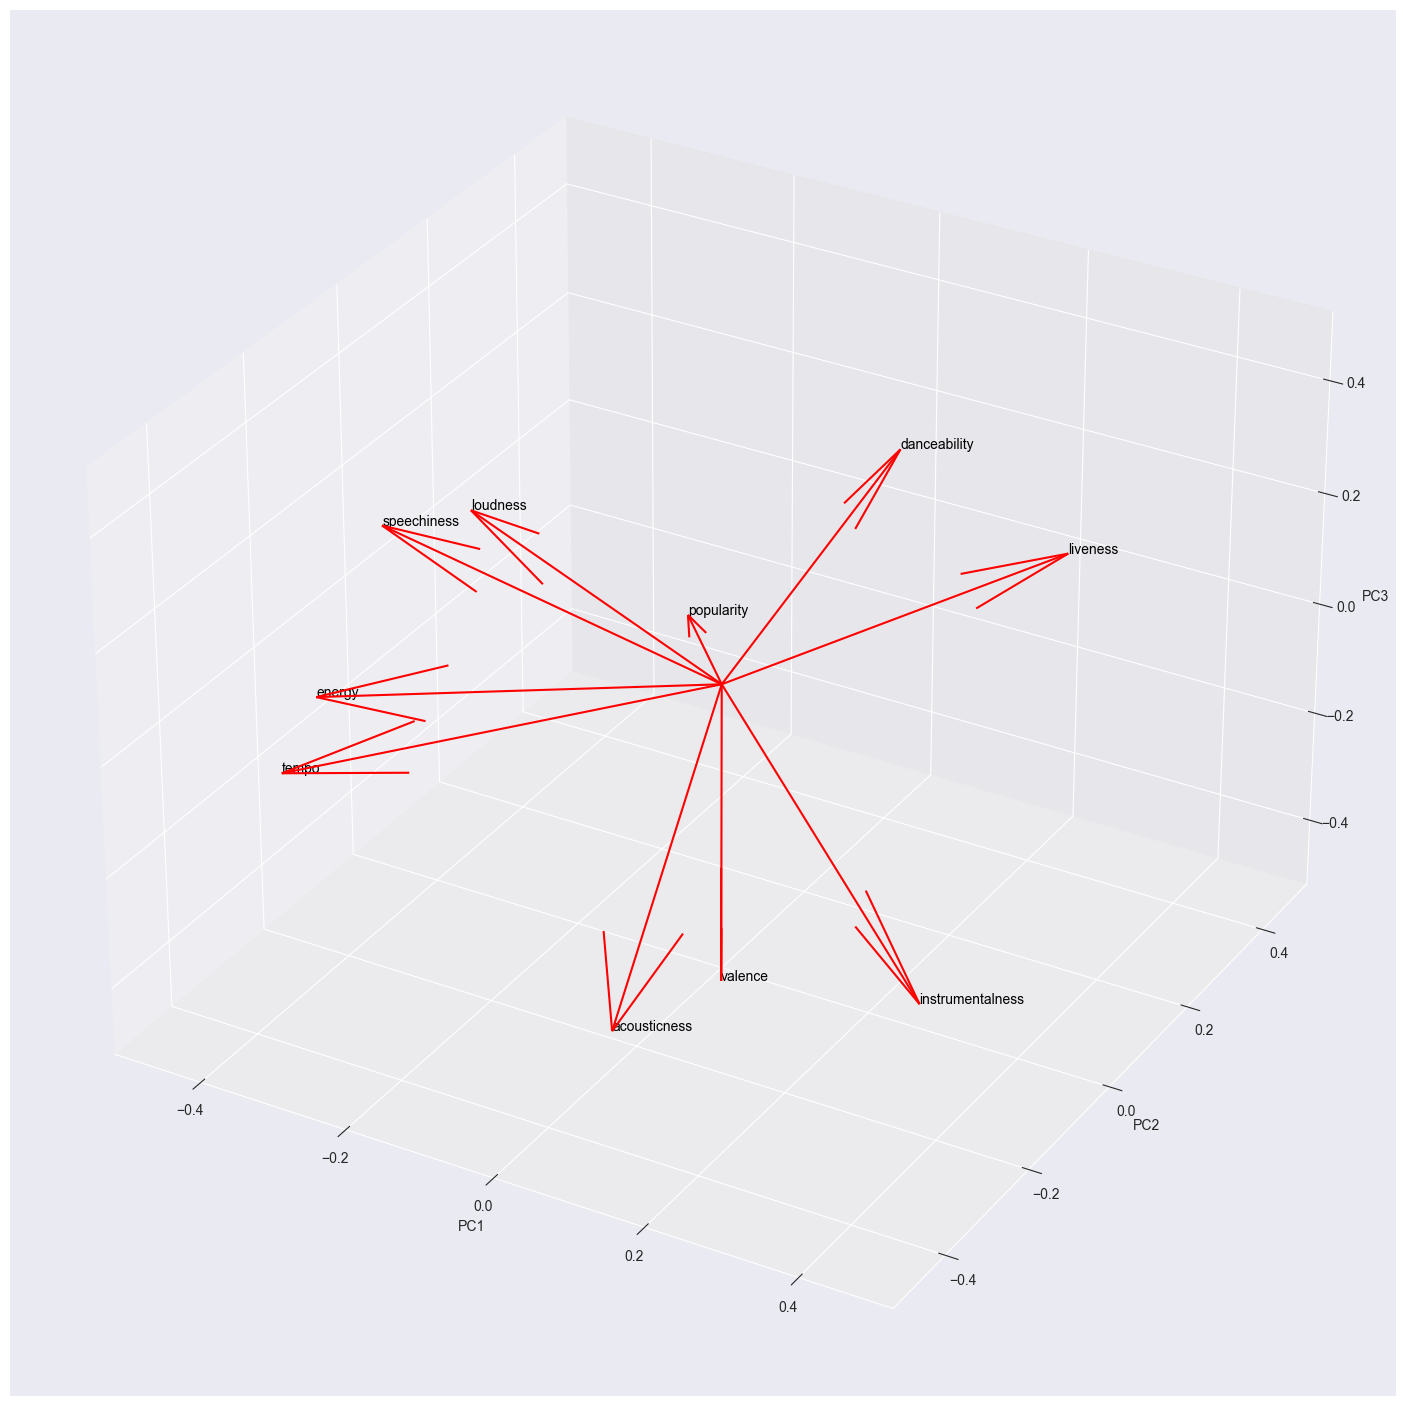

In [351]:
# 3d plot of features on pca
fig = plt.figure(figsize=(30, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
for i in range(len(df_pca.columns)):
    ax.quiver(0, 0, 0, pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], color='red')
    ax.text(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], df_pca.columns[i], color='k')